In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df1 = pd.read_csv("features_clean.csv")
df6 = pd.read_csv("features_clean_6.csv")

print("Shape:", df1.shape)
print("Shape:", df6.shape)
df1

Shape: (3396, 15)
Shape: (2700, 15)


,thumb_index_dist,wrist_index_dist,pinky_index_dist,palm_width,spread_x,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture
0,0.023417,0.103391,0.014156,0.011816,0.007068,0.010327,0.004076,1.981728,8.749580,0.017184,0.004076,1.454242,0.014128,0.000000,other
1,0.018745,0.099936,0.035472,0.025405,0.015162,0.016940,0.007650,0.737830,3.933585,0.011990,0.007650,0.471933,0.018321,0.090307,other
2,0.010403,0.104244,0.043880,0.032343,0.011160,0.015607,0.010430,0.321624,3.222977,-0.000971,0.010430,-0.030025,0.025594,0.130101,other
3,0.008647,0.080850,0.010934,0.017945,0.004597,0.006975,0.001611,0.481811,4.505125,0.004113,0.001611,0.229198,0.075540,0.105534,other
4,0.011484,0.100787,0.037687,0.023849,0.005953,0.013449,0.010250,0.481500,4.225918,0.010205,0.010250,0.427905,0.010517,0.129368,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,0.043977,0.153352,0.092014,0.062892,0.036430,0.051707,0.006710,0.699232,2.438302,0.014431,0.006710,0.229451,0.225033,0.011902,other
3392,0.043080,0.153382,0.093459,0.062641,0.036605,0.051753,0.006121,0.687724,2.448563,0.012384,0.006121,0.197693,0.216910,0.008567,other
3393,0.044546,0.153426,0.092928,0.062720,0.036889,0.051631,0.006319,0.710230,2.446167,0.012152,0.006319,0.193744,0.225917,0.007659,other
3394,0.043790,0.154754,0.093307,0.063192,0.036931,0.051052,0.006327,0.692962,2.448912,0.011881,0.006327,0.188011,0.221719,0.007127,other


In [4]:
df6

,thumb_index_dist,wrist_index_dist,pinky_index_dist,palm_width,spread_x,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture
0,0.100982,0.166283,0.091066,0.074762,0.039528,0.056765,0.004634,1.350696,2.224122,0.014826,0.004634,0.198304,0.284904,0.000000,other
1,0.108138,0.166190,0.090168,0.078341,0.039642,0.058406,0.007161,1.380330,2.121336,0.028760,0.007161,0.367113,0.326982,0.044206,other
2,0.107175,0.166007,0.091285,0.078754,0.040867,0.056601,0.005535,1.360860,2.107888,0.032085,0.005535,0.407399,0.328353,0.014940,other
3,0.106418,0.165346,0.091030,0.078663,0.040539,0.056581,0.005400,1.352812,2.101922,0.031077,0.005400,0.395060,0.321603,0.004173,other
4,0.107162,0.166429,0.091558,0.079011,0.039878,0.057179,0.005780,1.356272,2.106376,0.031786,0.005780,0.402295,0.307252,0.006523,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.072358,0.157376,0.085686,0.067850,0.043021,0.035169,0.019377,1.066431,2.319429,-0.028957,0.019377,-0.426768,0.218137,0.097122,other
2696,0.064223,0.148654,0.089834,0.073550,0.041476,0.037310,0.020354,0.873171,2.021085,-0.054096,0.020354,-0.735484,0.165105,0.128129,other
2697,0.076561,0.154069,0.077075,0.091138,0.023263,0.044246,0.030833,0.840046,1.690482,-0.081070,0.030833,-0.889526,0.158159,0.186270,other
2698,0.109645,0.156484,0.091428,0.092957,0.017344,0.059269,0.036762,1.179512,1.683380,-0.102613,0.036762,-1.103864,0.130940,0.251226,other


In [5]:
df = pd.concat([df1, df6], ignore_index=True)

In [6]:
df

,thumb_index_dist,wrist_index_dist,pinky_index_dist,palm_width,spread_x,spread_y,spread_z,norm_thumb_index,norm_wrist_index,z_mean_tip,z_std_tip,z_mean_tip_norm,thumb_index_angle_xy,velocity_magnitude,Gesture
0,0.023417,0.103391,0.014156,0.011816,0.007068,0.010327,0.004076,1.981728,8.749580,0.017184,0.004076,1.454242,0.014128,0.000000,other
1,0.018745,0.099936,0.035472,0.025405,0.015162,0.016940,0.007650,0.737830,3.933585,0.011990,0.007650,0.471933,0.018321,0.090307,other
2,0.010403,0.104244,0.043880,0.032343,0.011160,0.015607,0.010430,0.321624,3.222977,-0.000971,0.010430,-0.030025,0.025594,0.130101,other
3,0.008647,0.080850,0.010934,0.017945,0.004597,0.006975,0.001611,0.481811,4.505125,0.004113,0.001611,0.229198,0.075540,0.105534,other
4,0.011484,0.100787,0.037687,0.023849,0.005953,0.013449,0.010250,0.481500,4.225918,0.010205,0.010250,0.427905,0.010517,0.129368,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,0.072358,0.157376,0.085686,0.067850,0.043021,0.035169,0.019377,1.066431,2.319429,-0.028957,0.019377,-0.426768,0.218137,0.097122,other
6092,0.064223,0.148654,0.089834,0.073550,0.041476,0.037310,0.020354,0.873171,2.021085,-0.054096,0.020354,-0.735484,0.165105,0.128129,other
6093,0.076561,0.154069,0.077075,0.091138,0.023263,0.044246,0.030833,0.840046,1.690482,-0.081070,0.030833,-0.889526,0.158159,0.186270,other
6094,0.109645,0.156484,0.091428,0.092957,0.017344,0.059269,0.036762,1.179512,1.683380,-0.102613,0.036762,-1.103864,0.130940,0.251226,other


In [7]:
df.isnull().sum()

thumb_index_dist        0
wrist_index_dist        0
pinky_index_dist        0
palm_width              0
spread_x                0
spread_y                0
spread_z                0
norm_thumb_index        0
norm_wrist_index        0
z_mean_tip              0
z_std_tip               0
z_mean_tip_norm         0
thumb_index_angle_xy    0
velocity_magnitude      0
Gesture                 0
dtype: int64

In [14]:
df['Gesture'].value_counts()

Gesture
h        2165
p        1396
r        1092
other     705
s         601
g         137
Name: count, dtype: int64

              precision    recall  f1-score   support

           g       0.81      0.75      0.78        28
           h       0.81      0.91      0.86       433
       other       0.97      0.95      0.96       141
           p       0.89      0.82      0.86       279
           r       0.94      0.90      0.92       219
           s       0.93      0.79      0.86       120

    accuracy                           0.88      1220
   macro avg       0.89      0.86      0.87      1220
weighted avg       0.88      0.88      0.88      1220



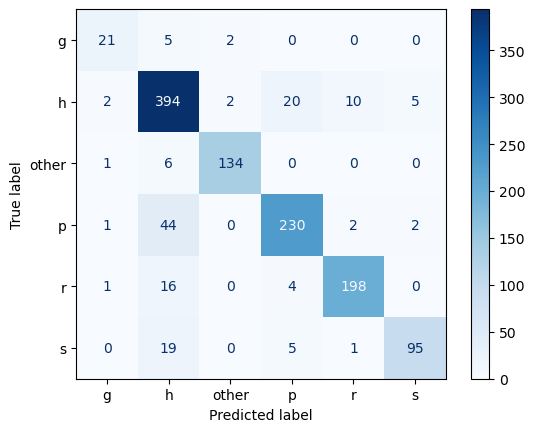

In [15]:
X = df.drop(columns=['Gesture'])
y = df['Gesture']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")

              precision    recall  f1-score   support

           h       0.82      0.93      0.87       433
       other       0.98      0.94      0.96       141
           p       0.92      0.79      0.85       279
           r       0.95      0.93      0.94       219
           s       0.94      0.84      0.89       120

    accuracy                           0.89      1192
   macro avg       0.92      0.89      0.90      1192
weighted avg       0.90      0.89      0.89      1192



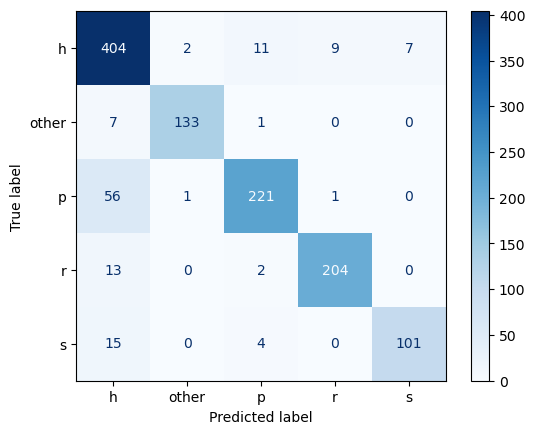

In [18]:
df_no_g = df[df['Gesture'] != 'g'].copy()

X = df_no_g.drop(columns=['Gesture'])
y = df_no_g['Gesture']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")

In [42]:
df_summary = df.groupby('Gesture').agg(['mean', 'std', 'min', 'max'])

df_summary

thumb_index_dist                               wrist_index_dist  \
                    mean       std       min       max             mean   
Gesture                                                                   
g               0.136295  0.079952  0.033914  0.357952         0.183740   
h               0.063067  0.028770  0.004126  0.271387         0.181694   
other           0.122234  0.075697  0.008647  0.357132         0.183074   
p               0.051909  0.024861  0.001967  0.128282         0.171820   
r               0.081750  0.058738  0.006730  0.367978         0.173322   
s               0.083395  0.034504  0.004117  0.228910         0.194323   

                                      pinky_index_dist            ...  \
              std       min       max             mean       std  ...   
Gesture                                                           ...   
g        0.020318  0.145900  0.226523         0.128008  0.029777  ...   
h        0.039251  0.022246  0.313594         0.120212  0.053772  ...   
other    0.035505  0.080850  0.287448         0.105557  0.043553  ...   
p        0.037530  0.021672  0.235300         0.123726  0.042555  ...   
r        0.044418  0.063828  0.302229         0.110406  0.033993  ...   
s        0.044683  0.026033  0.256896         0.193618  0.071536  ...   

        z_mean_tip_norm           thumb_index_angle_xy                      \
                    min       max                 mean       std       min   
Gesture                                                                      
g             -0.629363  0.972273             0.304912  0.231824  0.005903   
h             -4.169002  3.643263             0.103074  0.134807  0.004856   
other         -1.661158  1.454242             0.281405  0.149968  0.009278   
p             -2.817752  0.925377             0.116387  0.107453  0.005225   
r             -2.790808  1.042076             0.279714  0.300191  0.004887   
s             -5.995987  1.070660             0.138230  0.141446  0.004036   

                  velocity_magnitude                                
              max               mean       std       min       max  
Gesture                                                             
g        0.832746           0.098959  0.103314  0.007854  0.961831  
h        2.356648           0.099489  0.154606  0.008599  2.566056  
other    0.809037           0.052343  0.069142  0.000000  1.102738  
p        2.378188           0.046711  0.062013  0.003393  1.395245  
r        3.027146           0.121651  0.139767  0.009262  1.234669  
s        0.880703           0.060680  0.070637  0.009940  0.839486  

[6 rows x 56 columns]

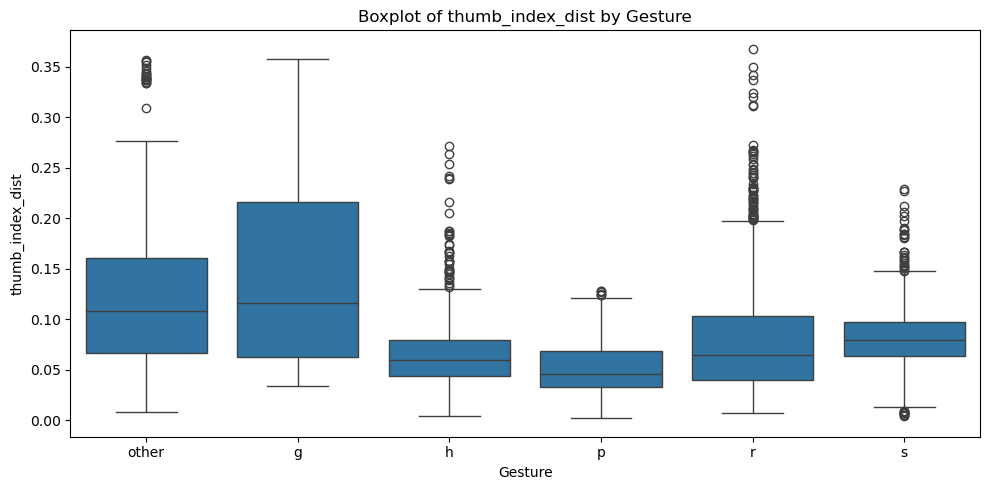

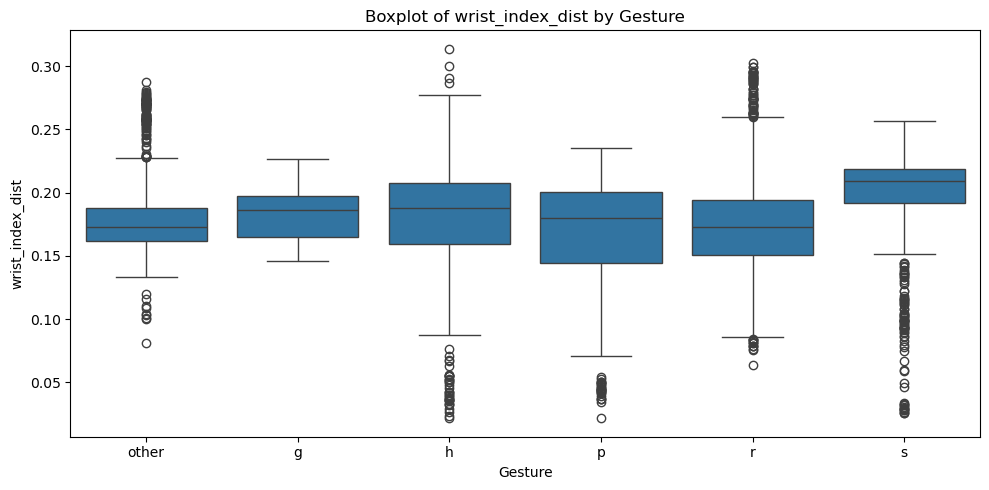

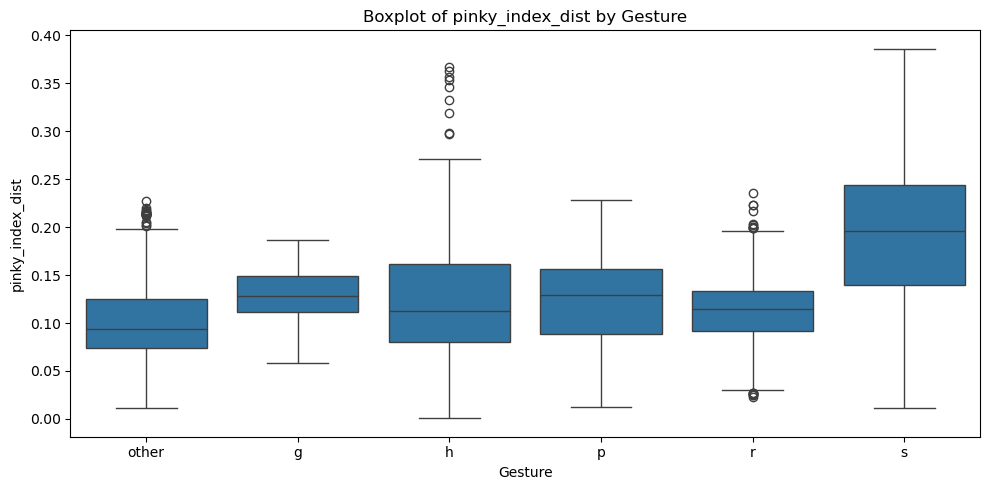

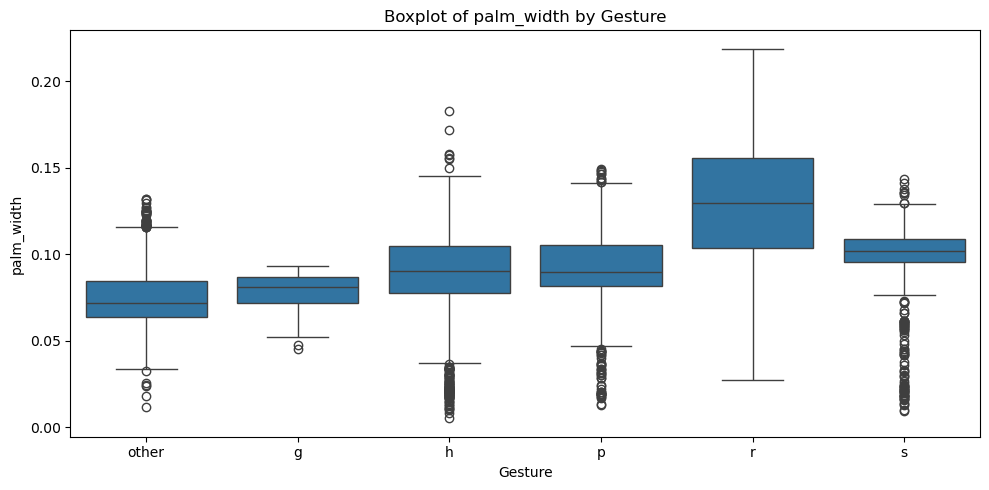

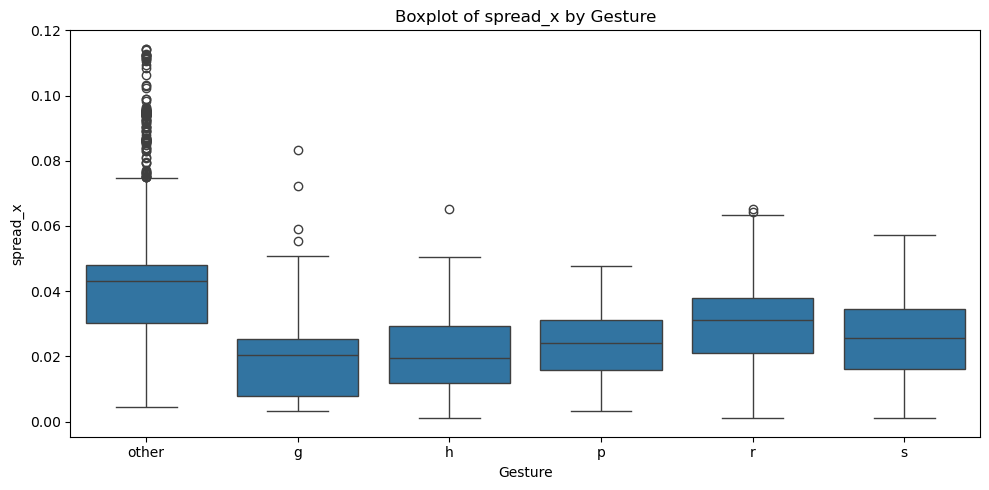

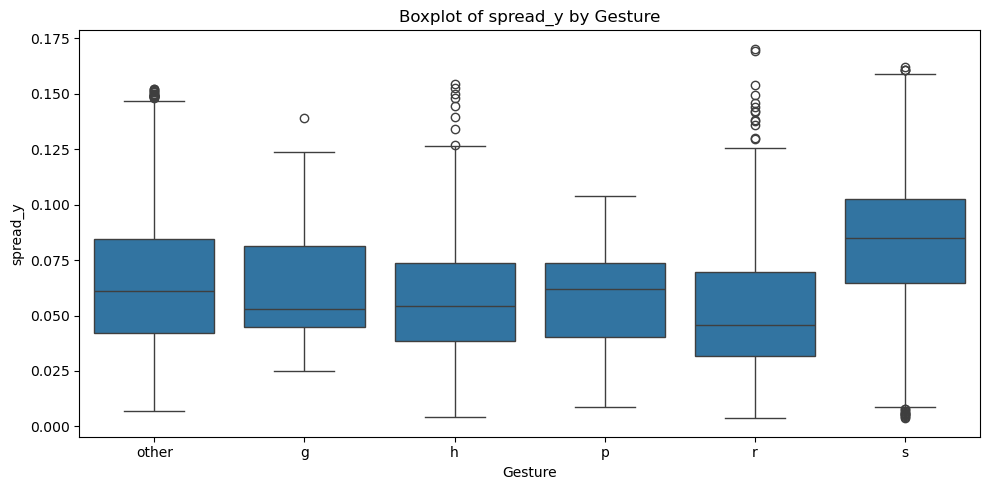

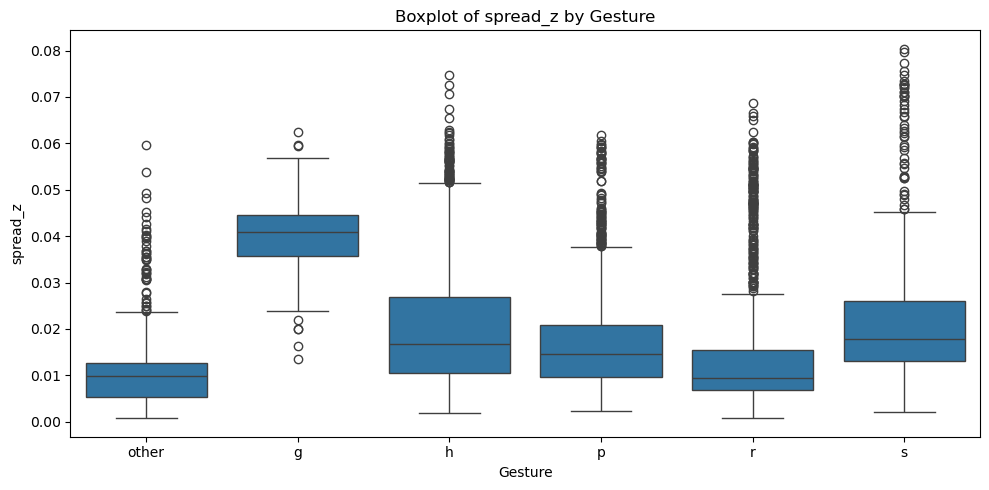

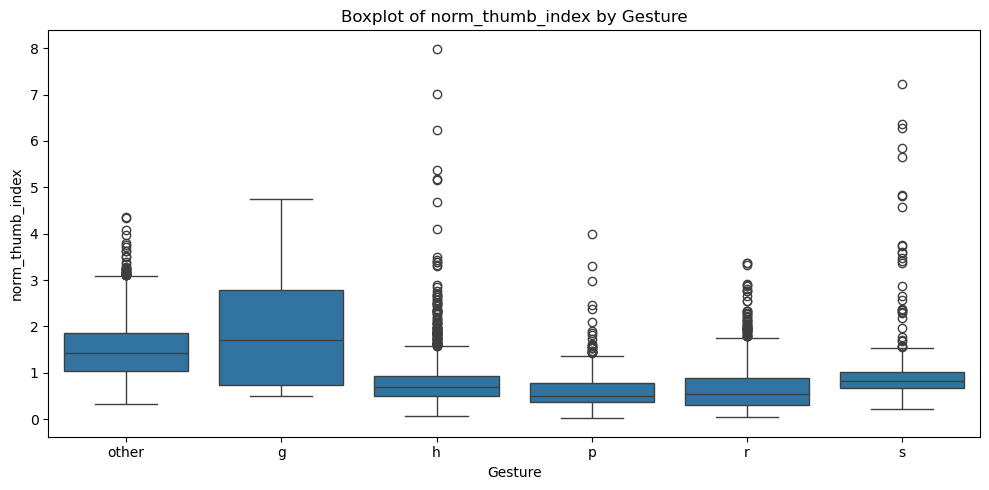

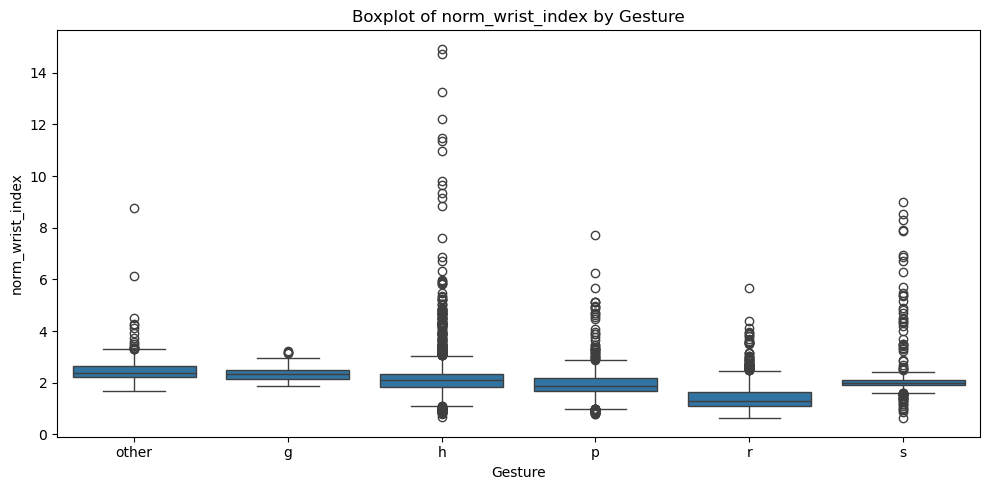

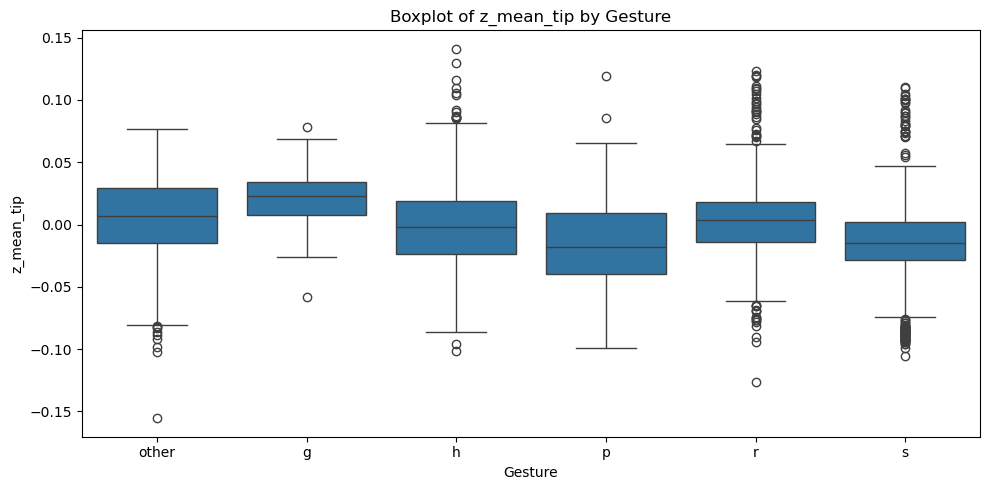

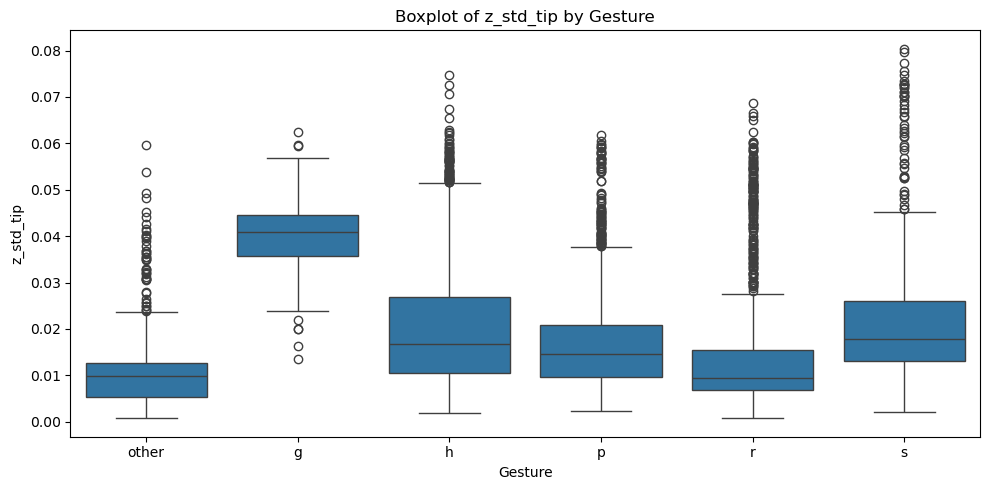

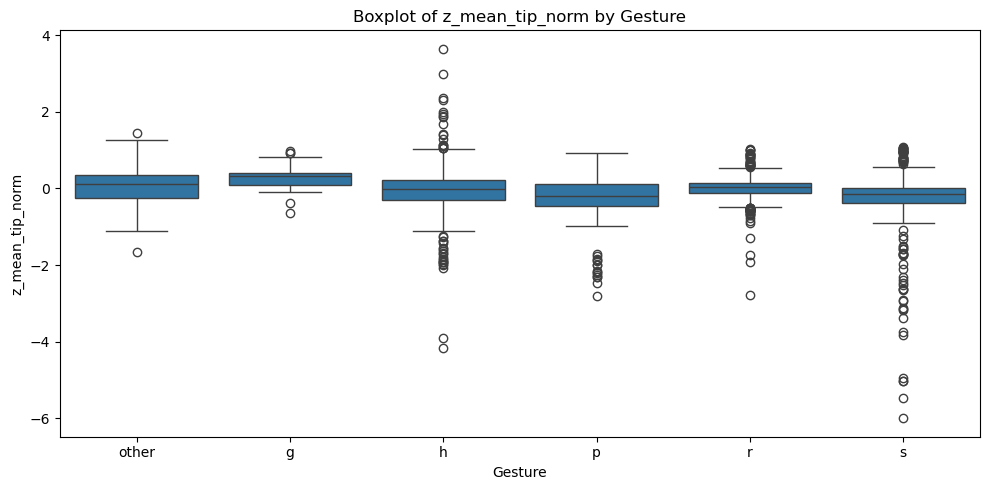

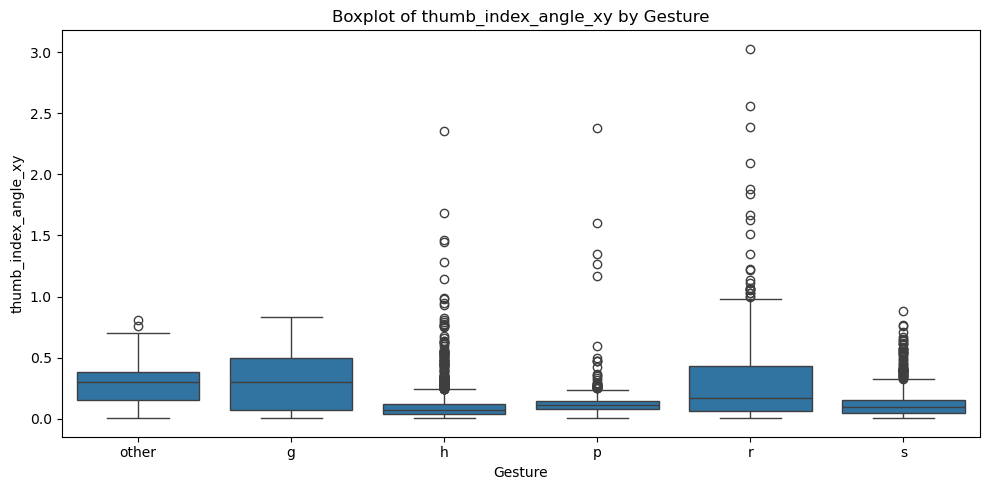

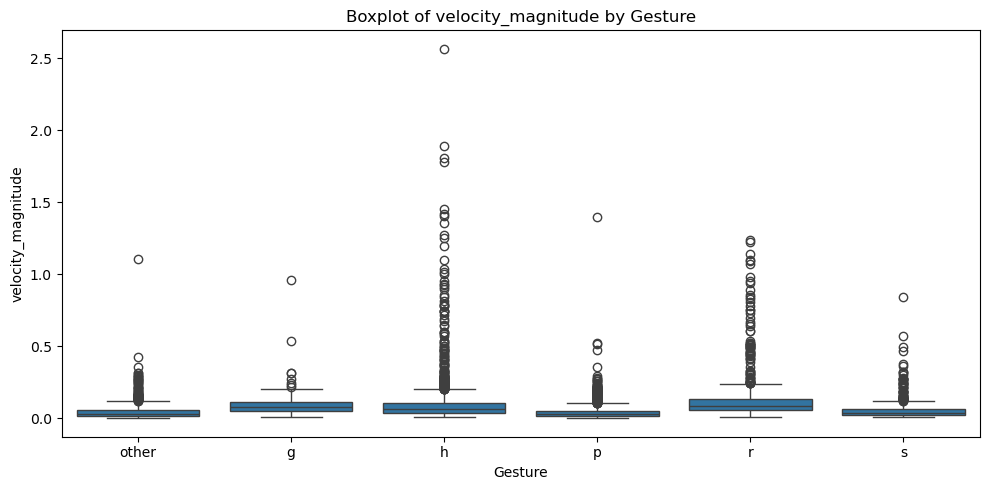

In [38]:
features = [
    'thumb_index_dist', 'wrist_index_dist', 'pinky_index_dist', 'palm_width',
    'spread_x', 'spread_y', 'spread_z',
    'norm_thumb_index', 'norm_wrist_index',
    'z_mean_tip', 'z_std_tip', 'z_mean_tip_norm',
    'thumb_index_angle_xy', 'velocity_magnitude'
]

for feat in features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Gesture', y=feat, data=df)
    plt.title(f'Boxplot of {feat} by Gesture')
    plt.tight_layout()
    plt.show()
